# Quick Sort

The **quick sort** algorithm also works recursively:
- Choose a pivot value from the array.
- Get smaller values left of the pivot.
- Do a quick sort to the left of the pivot.
- Do a quick sort to the right of the pivot.

In [1]:
# This function sorts an array between the left and rightindices.
def quick_sort(array, left, right):
    if(left < right):
        p = partition(array, left, right)
        quick_sort(array, left, p-1)
        quick_sort(array, p+1, right)

In [2]:
# This function partitions a segment of an array around a randomly chosen pivot and returns the pivot index.
from random import randint
def partition(array, left, right):
    i = randint(left, right) # this specific function is inclusive right and left
                            # the pivot value is at a random location
    array[right], array[i] = array[i], array[right] # but we'll keep it on the right
    p = left # until we find where it belongs
    
    for i in range(left, right):
        if array[i] < array[right]:
            array[i], array[p] = array[p], array[i] # shift smaller values left
            p += 1
        
    array[right], array[p] = array[p], array[right]
    return p # the pivot index

Let's do some testing

In [3]:
# This function prints something if our quick sort fails
def test_quick_sort():
    array = random_array()
    correct = sorted(array)
    quick_sort(array, 0, len(array)-1)
    if array != correct:
        print("Error quick sorting", array)

In [4]:
# This function creates and returns a small randomized array.
from random import randrange
def random_array():
    array = []
    n = randrange(20)
    while len(array) < n:
        array.append(randrange(20))
    return array

In [5]:
# This code should have no output
for test in range(100):
    test_quick_sort()

Compare merge_sort and quick_sort

In [6]:
# This function sorts an array between the left and right indices.
# This is O(nlogn)
def merge_sort(array, left, right):
    if left < right:
        middle = (left + right) // 2
        merge_sort(array, left, middle)
        merge_sort(array, middle+1, right)
        merge(array, left, middle, right)

In [7]:
# This function merges two segments of an array.
def merge(array, left, middle, right):
    left_segment = array[left:middle+1]
    right_segment = array[middle+1:right+1]
    j = 0
    n = 0
    
    for i in range(left, right + 1):
        if n == len(right_segment): # right segment is used up
            array[i] = left_segment[j]
            j += 1
        elif j == len(left_segment): # left segment is used up
            array[i] = right_segment[n]
            n += 1
        elif left_segment[j] < right_segment[n]:
            array[i] = left_segment[j]
            j += 1
        else:
            array[i] = right_segment[n]
            n += 1 

In [8]:
# This function times a sorting function on a range of problem sizes.
from random import shuffle
def timer(sort, lengths):
    times = []
    for n in lengths:
        array = list(range(n))
        shuffle(array)
        time = %timeit -n1 -r1 -o -q sort(array)
        times.append(time.average)
    return times

In [9]:
# This function just lets us call merge_sort simply.
def full_merge_sort(array):
    merge_sort(array, 0, len(array)-1)

In [10]:
# This function just lets us call merge_sort simply.
def full_quick_sort(array):
    quick_sort(array, 0, len(array)-1)

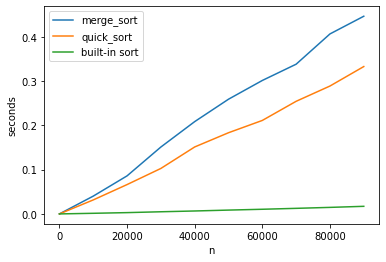

In [11]:
# This code plots some search times.
from matplotlib import pyplot
from numpy import arange

n = arange(1, 100_000, 10_000)

pyplot.plot(n, timer(full_merge_sort, n), label="merge_sort")
pyplot.plot(n, timer(full_quick_sort, n), label="quick_sort")
pyplot.plot(n, timer(sorted, n), label="built-in sort")

pyplot.ylabel("seconds")
pyplot.xlabel("n")
pyplot.legend()
pyplot.show()

Quick sort is pretty comparable to merge sort on this kind of data.

The built-in sort is a highly-optimized combination of merge sort and insertion sort called **Timsort**. 

Timsort is also $O(n\log n)$, but it has a much smaller constant multiplier, and it behaves more like $O(n)$ when it encounters runs.